In [1]:
import numpy as np
import pandas as pd
from FORCE.learning import Regression
from FORCE.utility import plot_learning_forecast

In [2]:
# fp = "/Users/jnunemak/Projects/FORCE/datasets/2018_OWMR.csv"
fp = "2018_OWMR.csv"
projects = pd.read_csv(fp, encoding="ISO-8859-1")

In [3]:
filters = {
   'Capacity MW (Max)': (149, ),
   'COD': (2014, 2019),
   'CAPEX_per_kw': (800, 8000.0)
}

to_aggregate = {
    'United Kingdom': 'United Kingdom',
    'Germany': 'Germany',
    'Netherlands': 'Netherlands',
    'Belgium' : 'Belgium',
    'China': 'China',
}

regression = Regression(
    projects,
    y_var="log CAPEX_per_kw",
    filters=filters,
    regression_variables=['Country Name', 'WaterDepthM (Max)', 'Turbine 1 Capacity MW',  'Capacity MW (Max)', 'DistanceFrom ShoreAuto'],
#     aggregate_countries=to_aggregate,
    drop_categorical=["United Kingdom"],
    log_vars=['Cumulative Capacity', 'CAPEX_per_kw']
)

In [4]:
forecast = {
#     2013: 4453,
#     2014: 7002,
#     2015: 7818,
#     2016: 12155,
#     2017: 12678,
#     2018: 16940,
    2019: 22592,
    2020: 33470,
    2021: 40366,
    2022: 43769,
    2023: 52924,
    2024: 63195,
    2025: 66675,
    2026: 83875,
    2027: 84875,
    2028: 90875,
    2031: 91325
}

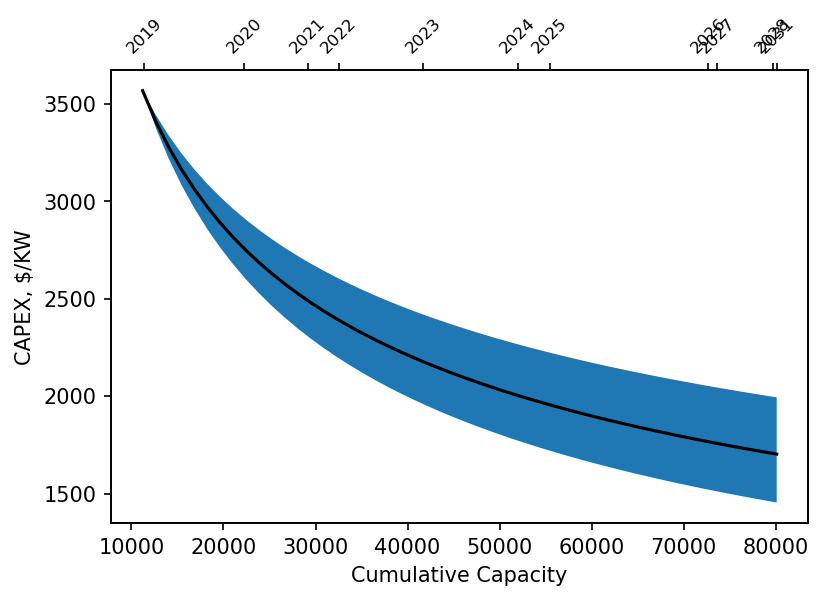

In [5]:
axes = plot_learning_forecast(
    installed=regression.installed_capacity,
    capex=regression.current_capex,
    fit=regression.cumulative_capacity_fit,
    forecast=forecast,
    bse=regression.cumulative_capacity_bse,
    perc_change=False,
    figsize=(6, 4),
    dpi=150
)

In [6]:
print(regression.cumulative_capacity_fit)

-0.37584226963263795
